In [2]:
library(tidyverse)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [7]:
as_event_file  = "data/ASprofile/L211029001-L_as_events.txt"
celltype_anno_file = "data/celltype_anno.csv"
iso_anno_file = "data/11.annotation/dedup.annotated.csv"

In [9]:
as_event_df = readr::read_tsv(as_event_file)
celltype_anno_df = readr::read_csv(celltype_anno_file)
iso_anno = readr::read_tsv(iso_anno_file)


── Column specification ────────────────────────────────────────────────────────
cols(
  id = col_character(),
  pbid = col_character(),
  length = col_double(),
  transcript = col_character(),
  gene = col_character(),
  category = col_character(),
  ontarget = col_logical(),
  ORFgroup = col_logical(),
  UMI = col_character(),
  UMIrev = col_character(),
  BC = col_character(),
  BCrev = col_character()
)




In [16]:
iso_anno%>%
    select("pbid","length","transcript","gene","category","BC")%>%
    mutate(BC_fix = paste0(BC,"-1"))%>%
    left_join(celltype_anno_df,by = c("BC_fix" = "barcode"))%>%
    filter(!is.na(celltype))%>%
    left_join(as_event_df,by = c("pbid" = "txpt_id"))->iso_as_df

In [19]:
event_type_plot = c("AE","IR_ON","MIR_ON","MSKIP_ON","SKIP_ON","TSS","TTS","XAE","XIR_ON","XMIR_ON","XMSKIP_ON","XSKIP_ON")

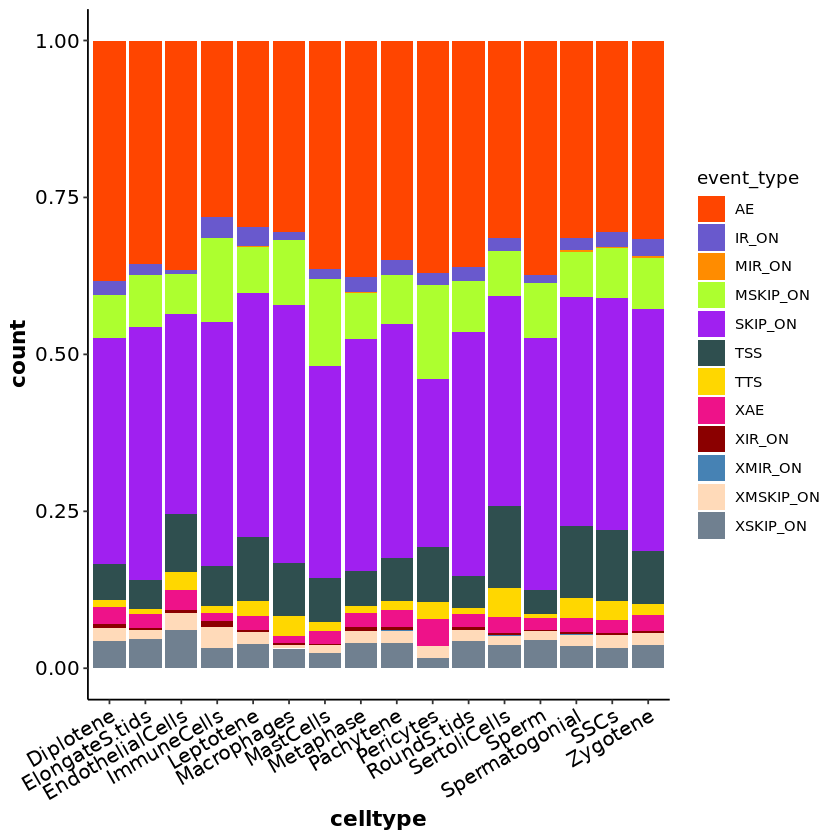

In [21]:
celltype_color = c("OrangeRed","SlateBlue3","DarkOrange","GreenYellow","Purple","DarkSlateGray","Gold","DeepPink2","Red4","#4682B4",
                   "#FFDAB9","#708090","#836FFF","#CDC673","#CD9B1D","#FF6EB4","#CDB5CD","DarkGreen","#008B8B",
                   "#43CD80","#483D8B","#66CD00","#CDC673","#CDAD00")
ggplot(iso_as_df%>%filter(event_type %in% event_type_plot),aes(x = celltype,fill = event_type))+
geom_bar(position = "fill")+
theme_classic()+ #coord_flip()+
scale_fill_manual(values = celltype_color)+
theme(
    #legend.position = "NA",
    axis.text.x=element_text(color = "black", size=12, angle = 30,hjust = 1),
    axis.text.y=element_text(color = "black", size=12),
    axis.title.x=element_text(color = "black", size = 13,face = "bold"),
    axis.title.y=element_text(color = "black", size = 13,face = "bold")
)->p
p

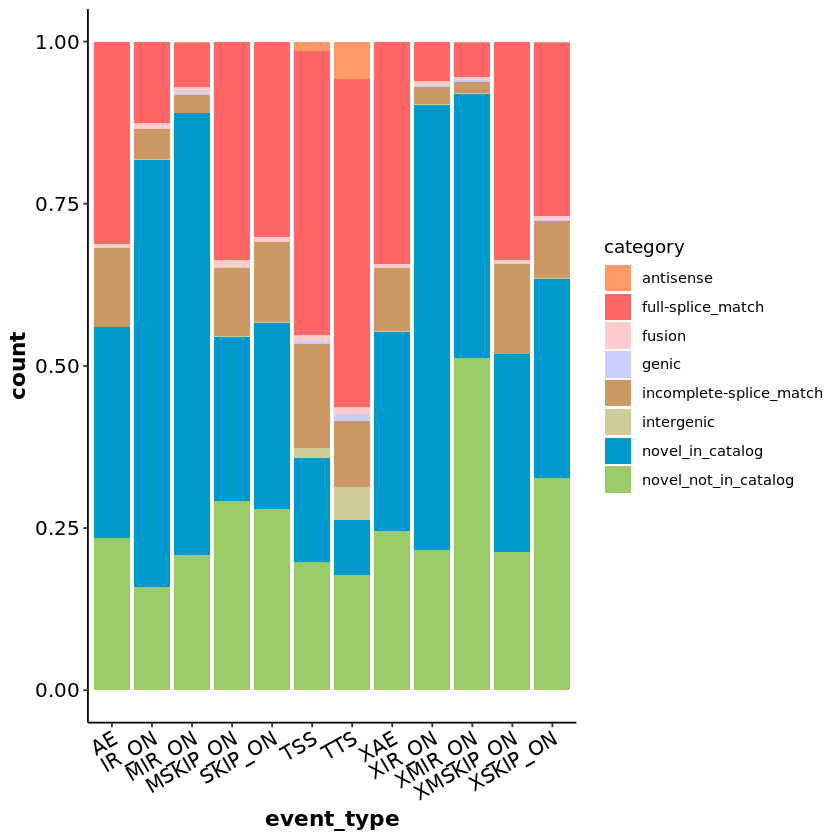

In [23]:
cate_color = c("#FF9966","#FF6666","#FFCCCC","#CCCCFF","#CC9966","#CCCC99","#0099CC","#99CC66")
ggplot(iso_as_df%>%filter(event_type %in% event_type_plot),aes(x = event_type,fill = category))+
geom_bar(position = "fill")+
theme_classic()+ #coord_flip()+
scale_fill_manual(values = cate_color)+
theme(
    #legend.position = "NA",
    axis.text.x=element_text(color = "black", size=12, angle = 30,hjust = 1),
    axis.text.y=element_text(color = "black", size=12),
    axis.title.x=element_text(color = "black", size = 13,face = "bold"),
    axis.title.y=element_text(color = "black", size = 13,face = "bold")
)->p
p

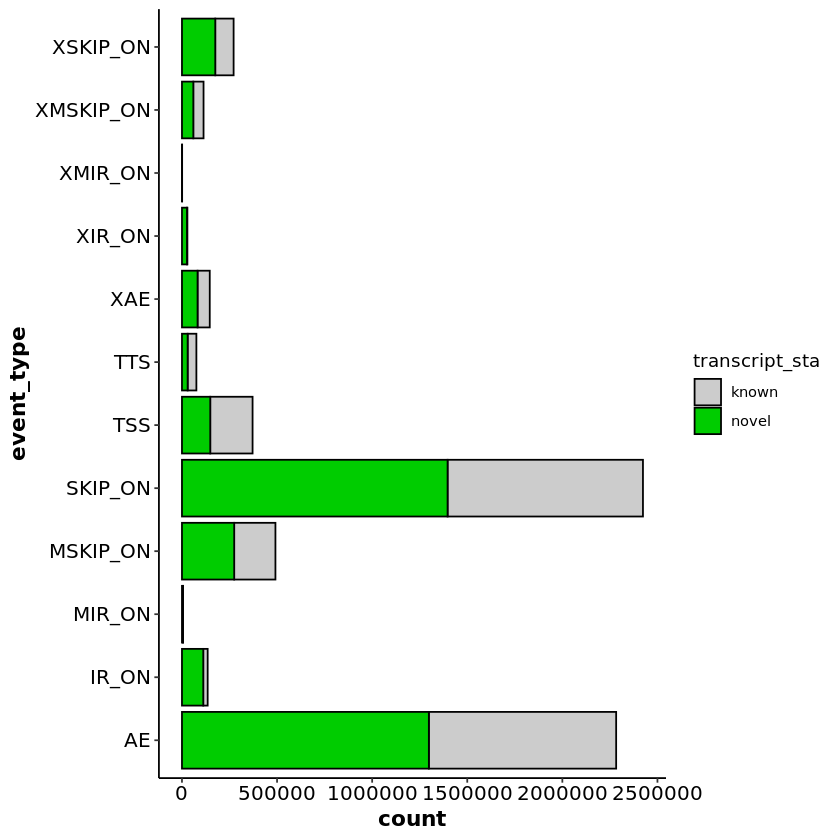

In [27]:
ggplot(iso_as_df%>%
           filter(event_type %in% event_type_plot)%>%
           mutate(transcript_sta = ifelse(transcript == "novel","novel","known")),aes(x = event_type,fill = transcript_sta))+
geom_bar(color = "black")+theme_classic()+ coord_flip()+
scale_fill_manual(values = c("#CCCCCC","#00CC00"))+
theme(
    #legend.position = "NA",
    axis.text.x=element_text(color = "black", size=12),
    axis.text.y=element_text(color = "black", size=12),
    axis.title.x=element_text(color = "black", size = 13,face = "bold"),
    axis.title.y=element_text(color = "black", size = 13,face = "bold")
)->p
p